In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка и анализ набора данных
raw_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
raw_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [3]:
# Размер набора данных
print(raw_dataset.shape)

(209, 10)


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

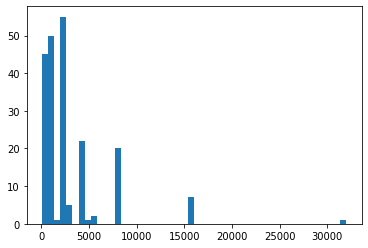

In [5]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = raw_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

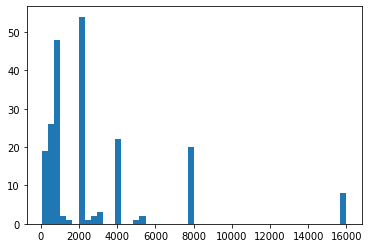

In [6]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

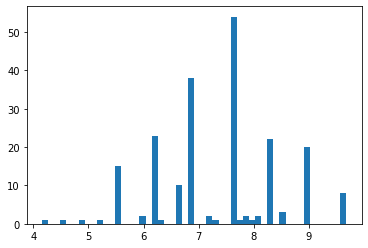

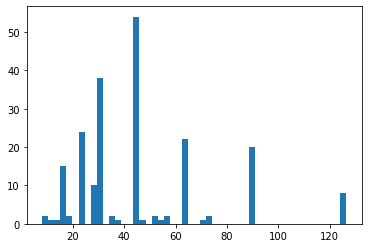

In [7]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [8]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [9]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [10]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

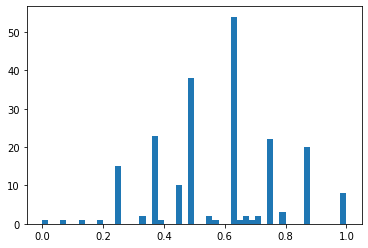

In [11]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

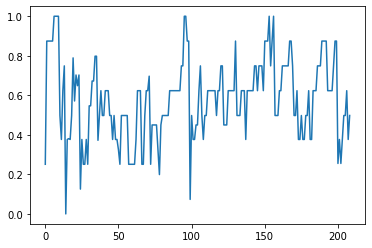

In [12]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [13]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [14]:
# Конвертируем в одномерный массив
data = data.flatten()

In [15]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

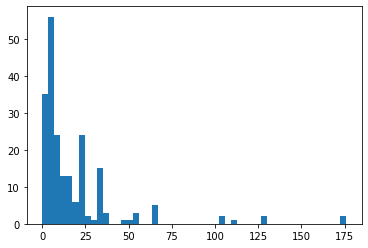

In [16]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = raw_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

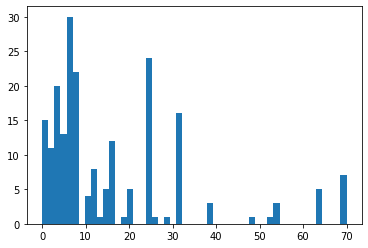

In [17]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

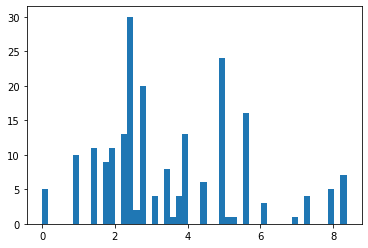

In [18]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [19]:
data = data ** 0.5

In [20]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [21]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

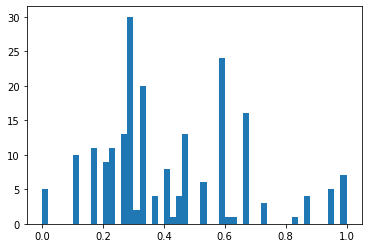

In [22]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

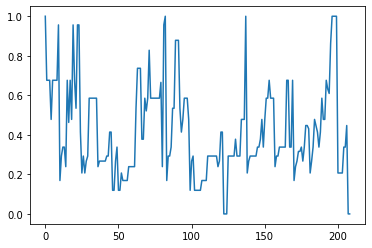

In [23]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [24]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [25]:
# Конвертируем в одномерный массив
data = data.flatten()

In [26]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data

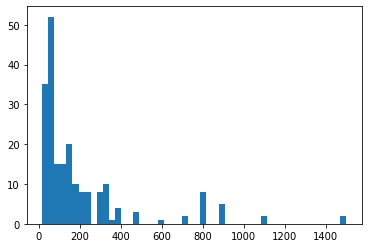

In [30]:
# Обработка данных в столбце №2

# Загружаем данные
data = raw_dataset[2]

# Анализируем распределение, используя гистограмму. 
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

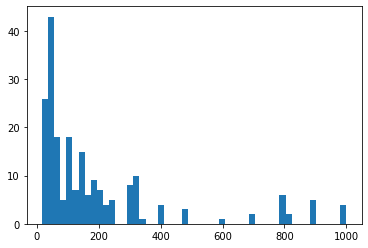

In [31]:
# Наблюдаем проблему №4 - выбросы значений в интервале (1000, 1500). Применяем отсечение с разрешенным интервалом от 0 до 1000.
data = numpy.clip(data, 0, 1000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

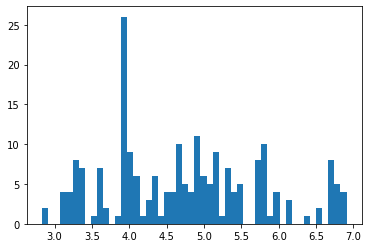

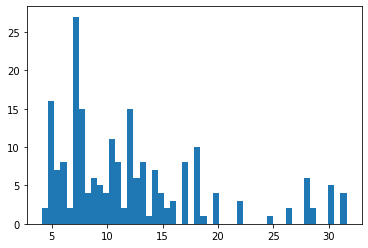

In [32]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [33]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [34]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

2.833213344056216
6.907755278982137


In [35]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

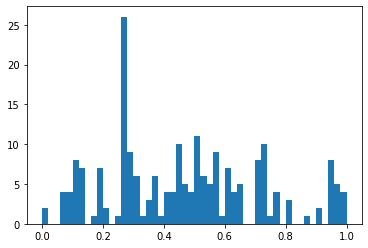

In [36]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

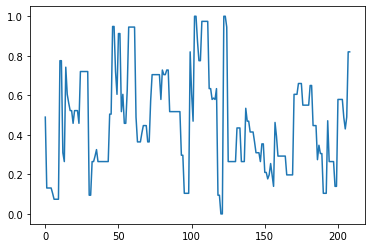

In [37]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [38]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [39]:
# Конвертируем в одномерный массив
data = data.flatten()

In [40]:
# Сохраняем в итоговом наборе данных
dataset['2'] = data

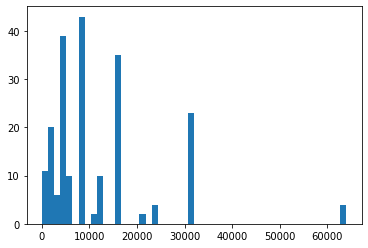

In [41]:
# Обработка данных в столбце №4

# Загружаем данные
data = raw_dataset[4]

# Анализируем распределение, используя гистограмму.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

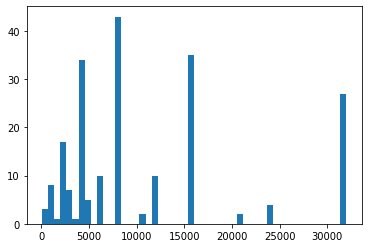

In [42]:
# Наблюдаем проблему №4 - выбросы значений в интервале (62000). Применяем отсечение с разрешенным интервалом от 0 до 32000.
data = numpy.clip(data, 0, 32000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

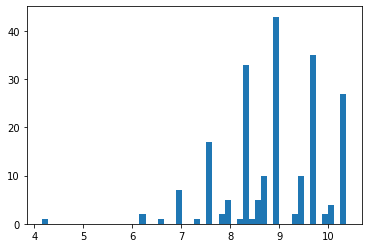

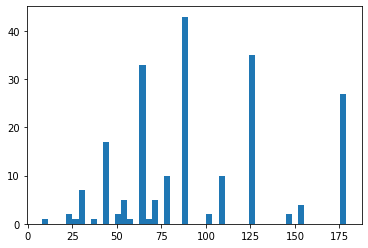

In [43]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [44]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [45]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
10.373491181781864


In [46]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

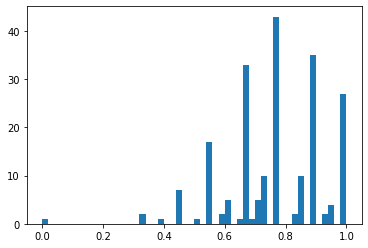

In [47]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

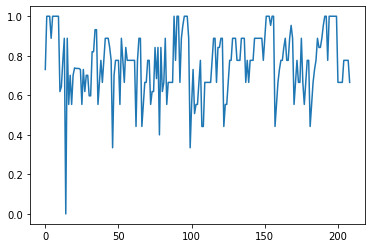

In [48]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [49]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [50]:
# Конвертируем в одномерный массив
data = data.flatten()

In [51]:
# Сохраняем в итоговом наборе данных
dataset['4'] = data

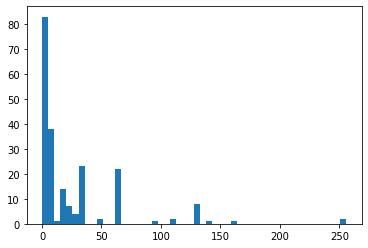

In [52]:
# Обработка данных в столбце №5

# Загружаем данные
data = raw_dataset[5]

# Анализируем распределение, используя гистограмму.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

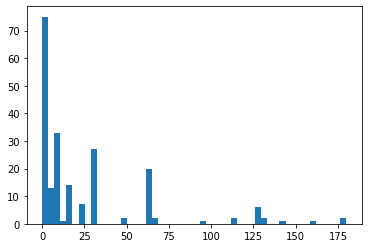

In [54]:
# Наблюдаем проблему №4 - выбросы значений в интервале (180, 260). Применяем отсечение с разрешенным интервалом от 0 до 180.
data = numpy.clip(data, 0, 180)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

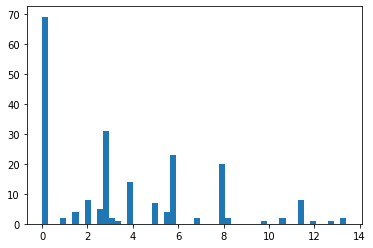

In [55]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [56]:
data = data ** 0.5

In [57]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
13.416407864998739


In [58]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

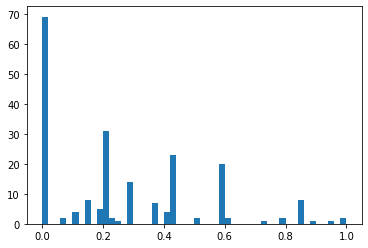

In [59]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

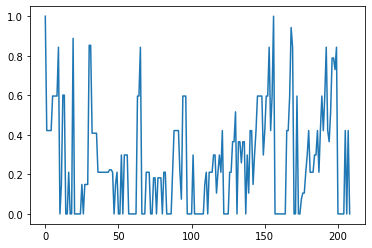

In [60]:
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [61]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [62]:
# Конвертируем в одномерный массив
data = data.flatten()

In [63]:
# Сохраняем в итоговом наборе данных
dataset['5'] = data

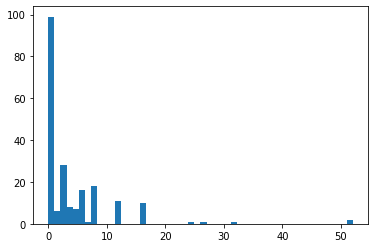

In [64]:
# Обработка данных в столбце №6 

# Загружаем данные
data = raw_dataset[6]

# Анализируем распределение, используя гистограмму.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

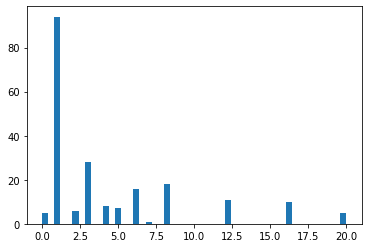

In [65]:
# Наблюдаем проблему №4 - выбросы значений в интервале (20, 60). Применяем отсечение с разрешенным интервалом от 0 до 20.
data = numpy.clip(data, 0, 20)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

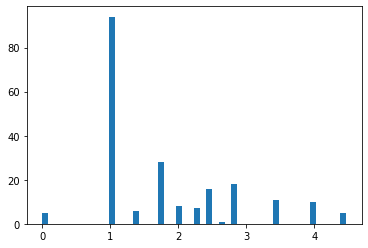

In [66]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [67]:
data = data ** 0.5

In [68]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
4.47213595499958


In [69]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

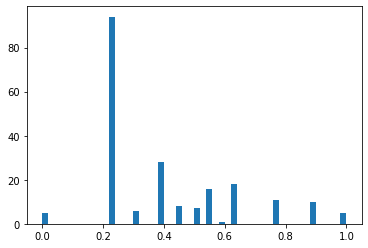

In [70]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

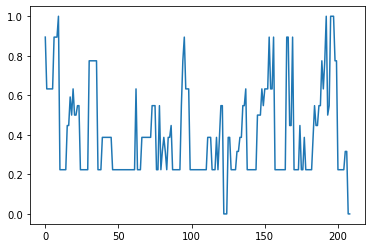

In [71]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [72]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [73]:
# Конвертируем в одномерный массив
data = data.flatten()

In [74]:
# Сохраняем в итоговом наборе данных
dataset['6'] = data

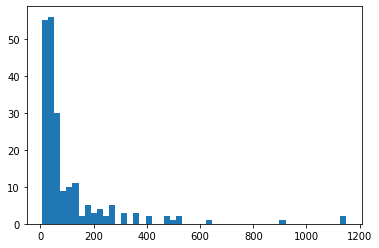

In [75]:
# Обработка данных в столбце №8 

# Загружаем данные
data = raw_dataset[8]

# Анализируем распределение, используя гистограмму.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

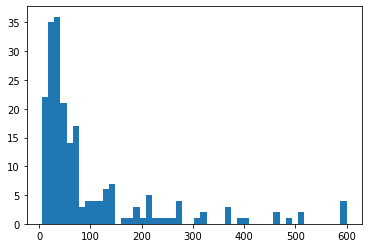

In [76]:
# Наблюдаем проблему №4 - выбросы значений в интервале (600, 1200). Применяем отсечение с разрешенным интервалом от 0 до 600.
data = numpy.clip(data, 0, 600)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

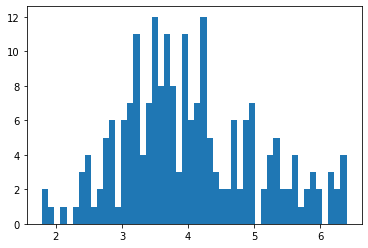

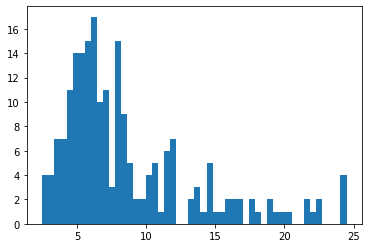

In [77]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [78]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [79]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

1.791759469228055
6.396929655216146


In [80]:
#Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

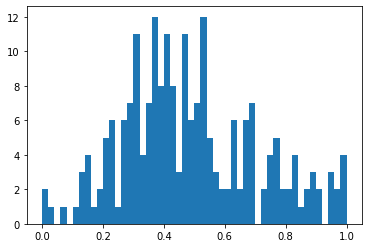

In [81]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

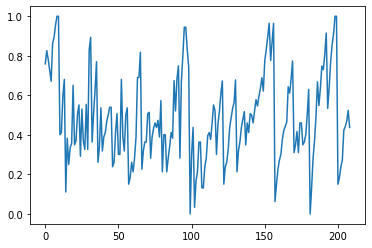

In [82]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [83]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [84]:
# Конвертируем в одномерный массив
data = data.flatten()

In [85]:
# Сохраняем в итоговом наборе данных
dataset['8'] = data

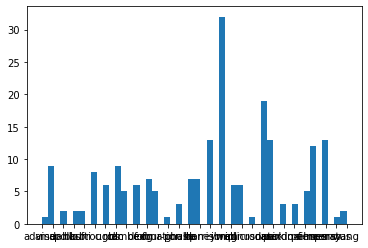

In [86]:
# Обработка данных в столбце №0

# Загружаем данные
data = raw_dataset[0]

# Анализируем распределение, используя гистограмму. 
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [87]:
print(dataset)

         MMIN     CHMAX         2         4         5         6         8
0    0.251074  1.000000  0.489650  0.730638  1.000000  0.894427  0.759257
1    0.874463  0.676123  0.131078  1.000000  0.421637  0.632456  0.825801
2    0.874463  0.676123  0.131078  1.000000  0.421637  0.632456  0.782136
3    0.874463  0.676123  0.131078  1.000000  0.421637  0.632456  0.728689
4    0.874463  0.478091  0.131078  0.888465  0.421637  0.632456  0.671211
..        ...       ...       ...       ...       ...       ...       ...
204  0.497852  0.338062  0.487679  0.776930  0.000000  0.223607  0.422549
205  0.497852  0.338062  0.429927  0.776930  0.421637  0.316228  0.442303
206  0.623389  0.447214  0.489650  0.776930  0.000000  0.316228  0.468926
207  0.376611  0.000000  0.819865  0.776930  0.421637  0.000000  0.523962
208  0.497852  0.000000  0.819865  0.665395  0.000000  0.000000  0.437531

[209 rows x 7 columns]


In [88]:
dataset.to_csv('prepared_data.csv')